<a href="https://colab.research.google.com/github/HARSHITAMOGHA001/Kavach-Daksh/blob/main/RNN_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

In [ ]:
data = pd.read_csv('NewData.csv')

In [ ]:
data.shape

(10000, 50)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

<Axes: >

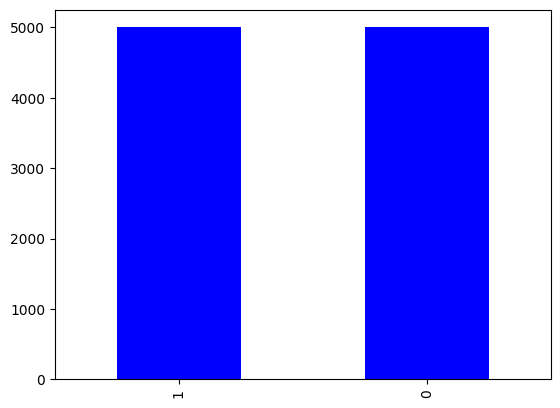

In [ ]:
data['CLASS_LABEL'].value_counts().plot.bar(color='blue')

In [ ]:
X = data.drop(columns=['id', 'CLASS_LABEL','SubdomainLevelRT','UrlLengthRT','PctExtResourceUrlsRT','Abnormal                                                                                                                              ExtFormActionR','ExtMetaScriptLinkRT','PctExtNullSelfRedirectHyperlinksRT'])
y = data['CLASS_LABEL']
print('x:', X)
print('y:', y)

x:       NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0           3               1          5         72        0   
1           3               1          3        144        0   
2           3               1          2         58        0   
3           3               1          6         79        1   
4           3               0          4         46        0   
...       ...             ...        ...        ...      ...   
9995        3               1          1         50        0   
9996        2               1          4         59        1   
9997        2               1          4         57        0   
9998        3               1          1         49        0   
9999        3               1          2         52        3   

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
0                     0         0            0              0           0   
1                     0         0            0              2           0 

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    GRU(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 42, 64)            12864     
                                                                 
 dropout_8 (Dropout)         (None, 42, 64)            0         
                                                                 
 gru_9 (GRU)                 (None, 64)                24960     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 39,937
Trainable params: 39,937
Non-trai

In [ ]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
history = model.fit(X_train_reshaped, y_train, batch_size=64, epochs=30, validation_data=(X_test_reshaped, y_test))

Epoch 1/30
125/125 [==============================] - 14s 78ms/step - loss: 0.5137 - accuracy: 0.7256 - val_loss: 0.3745 - val_accuracy: 0.8245
Epoch 2/30
125/125 [==============================] - 10s 76ms/step - loss: 0.3543 - accuracy: 0.8382 - val_loss: 0.3302 - val_accuracy: 0.8570
Epoch 3/30
125/125 [==============================] - 10s 81ms/step - loss: 0.2926 - accuracy: 0.8752 - val_loss: 0.2714 - val_accuracy: 0.8865
Epoch 4/30
125/125 [==============================] - 10s 80ms/step - loss: 0.2623 - accuracy: 0.8936 - val_loss: 0.2504 - val_accuracy: 0.8960
Epoch 5/30
125/125 [==============================] - 9s 70ms/step - loss: 0.2500 - accuracy: 0.9032 - val_loss: 0.2432 - val_accuracy: 0.9010
Epoch 6/30
125/125 [==============================] - 10s 79ms/step - loss: 0.2325 - accuracy: 0.9119 - val_loss: 0.2268 - val_accuracy: 0.9085
Epoch 7/30
125/125 [==============================] - 10s 84ms/step - loss: 0.2286 - accuracy: 0.9143 - val_loss: 0.2164 - val_accuracy: 

In [ ]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

63/63 [==============================] - 1s 17ms/step - loss: 0.1288 - accuracy: 0.9545
Test Loss: 0.1288, Test Accuracy: 0.9545


In [ ]:
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from sklearn.metrics import precision_score, accuracy_score,recall_score,f1_score
y_pred = model.predict(X_test_reshaped)
y_pred = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

data = {'num_of_features': [X_test.shape[1]],
        'precision': [precision],
        'recall': [recall],
        'f1_score': [f1],
        'accuracy': [accuracy]}

df = pd.DataFrame(data)

print(df)

63/63 [==============================] - 2s 16ms/step
   num_of_features  precision    recall  f1_score  accuracy
0               42   0.951914  0.958498  0.955194    0.9545


In [ ]:
size_of_test_data = len(X_test_reshaped)
print("Size of test data:", size_of_test_data)

Size of test data: 2000


In [ ]:
total_elements = X_test_reshaped.size
print("Total elements in test data:", total_elements)

Total elements in test data: 84000


In [ ]:
with open('rnn_gru_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('rnn_gru_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

y_pred_loaded = loaded_model.predict(X_test_reshaped)
y_pred_loaded = np.round(y_pred_loaded)

63/63 [==============================] - 2s 16ms/step


In [ ]:

predictions = model.predict(X_test_reshaped)

binary_predictions = [(1 if prediction[0] >= 0.5 else 0) for prediction in predictions]

print(binary_predictions)

63/63 [==============================] - 1s 16ms/step
[0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 

In [ ]:
model.save('model_weights_v2.h5')

In [ ]:
import pickle

extracted_features = [
        5,
        4,
        3,
        129,
        0,
        0,
        1,
        0,
        0,
        0,
        1,
        0,
        0,
        9,
        0,
        0,
        0,
        1,
        0,
        0,
        74,
        12,
        34,
        1,
        0,
]



In [ ]:
import pickle

# Load the pickled tuple from the file
with open('extracted_features.pickle', 'rb') as file:
    features = pickle.load(file)
with open('rnn_gru_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

y_pred_loaded = loaded_model.predict(X_test_reshaped)
y_pred_loaded = np.round(y_pred_loaded)
print(features)

[5, 4, 3, 129, 0, 0, 1, 0, 0, 0, 1, 0, 0, 9, 0, 0, 0, 1, 0, 0, 74, 12, 34, 1, 0]
